In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Reading the dataset of hospital
df = pd.read_csv("C:/Users/ammar.aamir/Documents/Assignment 2 (Python & R)/hospitaldata.csv")

In [3]:
# Question 1. Remove dots from column headers
cols = list(df.columns)
for i in range(0,len(cols)):
    cols[i] = cols[i].replace(".","")
cols
df.columns = cols
df.columns

Index(['Date', 'id', 'Time', 'Age', 'Sex', 'ConsultingDoctor', 'Specialty',
       'Procedure', 'TotalCharges', 'AmountReceived', 'AmountBalance',
       'AmountReceivedBy', 'AmountinHospital', 'ReceptionistName', 'NextApt'],
      dtype='object')

In [4]:
# Question 2. Which day of the week is expected to have most visits? 
# Counter shows Monday is the day with most visits, i.e. 51.
days = []
for i in range(0,len(df.Date) - 1):
    days.append(df.Date[i].split(",")[0])
Counter(days)

Counter({'Friday': 25,
         'Monday': 51,
         'Saturday': 20,
         'Sunday': 7,
         'Thursday': 33,
         'Tuesday': 42,
         'Wednesday': 43})

In [5]:
# Question 3. What is the average age of patients?
# By removing "M" and replacing "nan","-" with 0, we get 28.4 as the average age of patient
#age = df.dropna(subset=["Age"])
age = list(df.Age)
fage = []
for i in range(0,len(age)):
    age[i] = str(age[i]).replace("nan", "0")
    age[i] = str(age[i]).replace("M", "")
    age[i] = str(age[i]).replace("-", "0")
    age[i] = float(age[i])
np.mean(age)

28.463963963963963

In [6]:
# Question 4. How many children were entertained? (Make a Bracket of Age from 1-12) 
# 24 children were entertained.
children = 0
for i in range(0,len(age)):
    if age[i] <= 12 and age[i] > 0:
        children += 1
children

24

For Male:


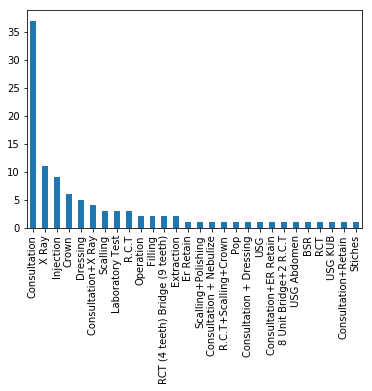

For Female:


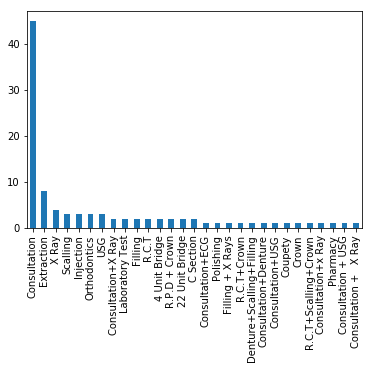

In [7]:
# Question 5. Which gender type had what kind of procedure in abundance?
# first plot shows Consultation is the highest procedure count for Male
# second plot shows Consultation is the highest procedure count for female too.
print("For Male:")
df[df["Sex"]=="M"].Procedure.value_counts().plot(kind='bar')
plt.show()
print("For Female:")
df[df["Sex"]=="F"].Procedure.value_counts().plot(kind='bar')
plt.show()

In [19]:
#Question 6. Which Doctor is earning highest?
# First we obtain a list of unique doctors then extracting the list of total charges of each doctor. 
# Finally taking sum of each in a list. Taking max from the list gives us the answer i.e. 'Dr Alaf Khan'
doc = df.ConsultingDoctor.unique()
doc = list(doc)
money = []
for d in doc:
    doc1 = df[df["ConsultingDoctor"] == d].TotalCharges
    doc1 = list(doc1)
    for i in range(0,len(doc1)):
        doc1[i] = str(doc1[i]).replace("nan", "0")
        doc1[i] = str(doc1[i]).replace("Cancelled", "0")
        doc1[i] = float(doc1[i])
    money.append(sum(doc1))
doc[money.index(max(money))]

'Dr Alaf Khan'

In [223]:
df

,Date,id,Time,Age,Sex,ConsultingDoctor,Specialty,Procedure,TotalCharges,AmountReceived,AmountBalance,AmountReceivedBy,AmountinHospital,ReceptionistName,NextApt
0,"Sunday, January 01, 2017",101,11:00,40,F,Dr Kinza Alam,Gynae,C Section,30000,30000.0,-,Mrs Shamsa,NaN,Hamza,NaN
1,"Monday, January 02, 2017",150,10:45AM,26,M,Nursing Staff,NaN,Dressing,1500,1500.0,-,Dr Saniya,NaN,Haris,NaN
2,"Monday, January 02, 2017",58,12:38PM,30,F,Dr Riffat Naheed,Psychotherapist,Consultation,1000,1000.0,-,Mrs Shamsa,300.0,Fiza,NaN
3,"Monday, January 02, 2017",75,1:00PM,40,M,Dr Riffat Naheed,Psychotherapist,Consultation,1500,1500.0,-,Mrs Shamsa,450.0,Zaheer,NaN
4,"Monday, January 02, 2017",97,2:45PM,27,M,Dr Riffat Naheed,Psychotherapist,Consultation,2000,2000.0,-,Mrs Shamsa,600.0,Haris,NaN
5,"Monday, January 02, 2017",101,3:00PM,40,F,Dr Kinza Alam,Gynae,C Section,35000,35000.0,-,Dr Saniya,NaN,Haris,NaN
6,"Monday, January 02, 2017",26,3:28PM,43,M,Dr Saniya,M/o,Consultation,2000,2000.0,-,Dr Saniya,NaN,Fiza,NaN
7,"Monday, January 02, 2017",149,3:45PM,28,F,Dr Fakiha,Dentist,Consultation,500,500.0,-,Mrs Shamsa,500.0,Haris,NaN
8,"Monday, January 02, 2017",20,3:45PM,2,F,Dr Fakiha,Dentist,Consultation,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN
9,"Monday, January 02, 2017",72,5:00PM,40,M,Dr Fakiha,Dentist,Consultation,500,500.0,-,Mrs Shamsa,500.0,Fiza,NaN
